<a href="https://colab.research.google.com/github/saquibali7/MultiModalHateDetection/blob/main/MultimodalHateSpeech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
HateSpeech = "/content/drive/MyDrive/hateSpeechDetection/Hate Speech"
NoHateSpeech = "/content/drive/MyDrive/hateSpeechDetection/No Hate Speech"


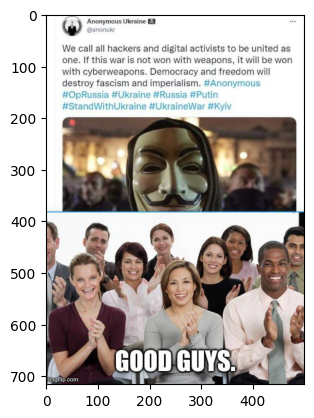

In [4]:
images = os.listdir(HateSpeech)
idx = random.randint(0,len(images))
img_path = os.path.join(HateSpeech,images[idx])
img = Image.open(img_path)
img = np.array(img)
plt.imshow(img)

In [5]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 0s (28.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fron

In [11]:
import pytesseract
import shutil
import os
import random
from pytesseract import pytesseract

In [8]:
def extract_text(path):
  image_path=path
  extractedInformation = pytesseract.image_to_string(Image.open(image_path))
  return extractedInformation



In [12]:
print(extract_text(img_path))

Anonymous Ukraine

 

We call all hackers and digital activists to be united as
one. If this war is not won with weapons, it will be won
with cyberweapons. Democracy and freedom will
destroy fascism and imperialism. #Anonymous
#OpRussia #Ukraine #Russia #Putin
#StandWithUkraine #UkraineWar #Kyiv

 

tee

